In [1]:
import git
import pandas as pd
import re
import nltk
from collections import Counter
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danyu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
#!git clone https://github.com/Thiag0car/Costume-Trends-Scraper

In [3]:
df = pd.read_csv(r"C:\Users\danyu\Documents\Trabalho_Savino\Costume-Trends\Web Scraping\Redes Sociais Scraping\textos_redes_sociais.csv")

In [4]:
df.head()

,Texto,Data,Redes Sociais,sentimento
0,Olá gente linda! no Vídeo estou fazendo uma pa...,2023-05-26 05:52 AM,youtube.com,Positive
1,Video can be found here,2023-05-26 05:42 AM,youtube.com,Negative
2,Aô época boa sô 🌽 🌾 #festajunina #docesjuninos...,2023-05-26 05:42 AM,tiktok.com,Positive
3,muito pra o sao joao? falta muito pra o sao jo...,2023-05-26 05:41 AM,twitter.com,Neutral
4,seus frescurentos #vaiprofy #festajunina #vaip...,2023-05-26 05:31 AM,tiktok.com,Neutral


In [5]:
df['Redes Sociais'].unique()

array(['youtube.com', 'tiktok.com', 'twitter.com', 'www2.bauru.sp.gov.br',
       'waldineypassos.com.br', 'emsergipe.com.br', '7minutos.com.br',
       'br.freepik.com', 'dpontanews.com.br', 'revolucaodesabores.com',
       'peleja.blog.br', 'olhandoatento.blogspot.com',
       'jornalgrandebahia.com.br', 'blognossavoz.com.br',
       'jornalzonasul.com.br', 'davidgomesbalancas.wordpress.com',
       'abelhaonoticias.blogspot.com', 'globoplay.globo.com',
       'utahroadsafety.com', 'audioativo.com', 'ifolharegional.com.br',
       'terra.com.br', 'jornalopiniao.net', 'fashionbubbles.com',
       'sopacultural.com', 'sergipepress.com.br', 'hojepr.com',
       'fabionoticiasdacidade.blogspot.com', 'osollo.com.br',
       'blogalangoncalves.net', 'itatiaia.com.br', 'sampi.net.br',
       'cornershopapp.com', 'novoblogdodimitri.blogspot.com',
       'ailtonpitombo.com.br', 'qualidadedevidanocampo.blogspot.com',
       'bilhetedanoticia.blogspot.com', 'blogdofinfa.com.br',
       'correio

# Pyspark

# Contagem Redes Sociais

In [6]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import Tokenizer, StopWordsRemover
from pyspark.sql.functions import explode
from nltk.corpus import stopwords

# SparkSession
spark = SparkSession.builder.getOrCreate()

# Stopwords em PT-BR
stopwords = stopwords.words('portuguese')

# Stopwords customizadas
custom_stopwords = ['[...]', '...', ' ', '',  '-', 'video', 'can', 'be', 'found', 'here', 'https', 'fyp', '.', '1', '#fyp', '–', '#fy']
stopwords.extend(custom_stopwords)


df = spark.read.csv(r"C:\Users\danyu\Documents\Trabalho_Savino\Costume-Trends\Web Scraping\Redes Sociais Scraping\textos_redes_sociais.csv", header=True)

# Tokenize the text column
tokenizer = Tokenizer(inputCol="Texto", outputCol="words")
df = tokenizer.transform(df)

# Remove stopwords from the tokenized words
remover = StopWordsRemover(inputCol="words", outputCol="filtered_words", stopWords=stopwords)
df = remover.transform(df)

# Explode the filtered words column into individual rows
df = df.select(explode("filtered_words").alias("word"))

# Perform MapReduce to count word occurrences
word_counts = df.groupby("word").count().orderBy("count", ascending=False)

word_counts.show(30)

+------------+-----+
|        word|count|
+------------+-----+
|       festa|  674|
|      junina|  467|
|#festajunina|  372|
|    #saojoao|  259|
|       milho|  156|
|       fazer|  139|
|     pamonha|  137|
|        joão|  129|
|         dia|  119|
|      festas|  102|
|      camisa|   92|
|      melhor|   89|
|     quentão|   86|
| tradicional|   83|
|      xadrez|   76|
|         sao|   75|
|         pra|   74|
|     junina,|   72|
|        bolo|   70|
|    pamonha,|   67|
|       curau|   65|
|        além|   63|
|         vai|   61|
|     receita|   60|
|      evento|   60|
|      junho,|   59|
|       junho|   58|
|     comidas|   58|
|    #pamonha|   57|
|      milho,|   56|
+------------+-----+
only showing top 30 rows



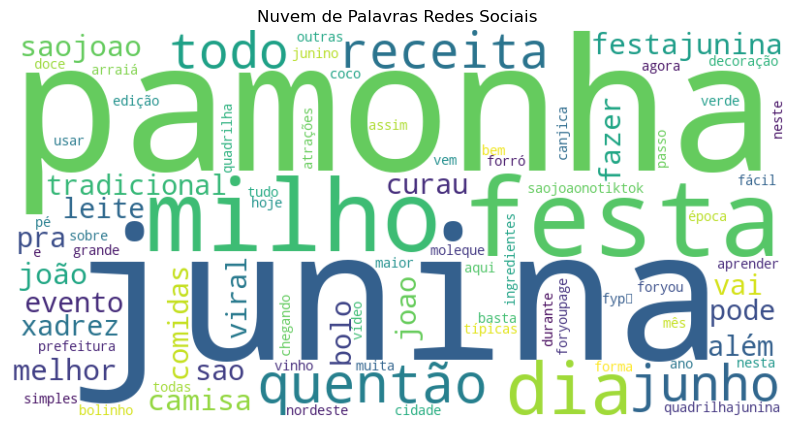

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Criação de wordcloud das palavras mais utilizadas
text_cloud = ' '.join([row['word'] for row in word_counts.limit(100).collect()])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_cloud)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras Redes Sociais')
plt.show()

# Contagem Sites

In [8]:
df = pd.read_csv(r"C:\Users\danyu\Desktop\dados_sites.csv")

In [9]:
df.head()

,url,texto
0,https://blog.wpensar.com.br/pedagogico/como-ab...,Produtos Gestão Escolar Captação d...
1,https://www.fazfacil.com.br/artesanato/festa-j...,Entrar Decoração Artesanato Jardim Ref...
2,https://www.guiadasemana.com.br/na-cidade/noti...,× Home Sobre nós Contato Pesquise e nav...
3,https://all.accor.com/pt-br/brasil/magazine/on...,All: Accor Live Limitless Menu Hospedagem Vo...
4,https://www.df.senac.br/faculdade/origem-da-fe...,Seja bem-vindo ao blog da Faculdade! ...


In [10]:
from nltk.corpus import stopwords
# SparkSession
spark = SparkSession.builder.getOrCreate()

# Stopwords em PT-BR
stopwords = stopwords.words('portuguese')

# Stopwords customizadas
custom_stopwords = ['the', ',', '2023', '',  '-', 'sobre', '|', 'leia', 'duvidas', '–', 'to', 'fyp']
stopwords.extend(custom_stopwords)

# Read the CSV file
df = spark.read.csv("C:/Users/danyu/Desktop/dados_sites.csv", header=True)

# Verify the schema and data in the DataFrame
df.printSchema()
df.show()

# Filter out null values in the "texto" column
df = df.filter(df["texto"].isNotNull())

# Tokenize the text column
tokenizer = Tokenizer(inputCol="texto", outputCol="words")
df = tokenizer.transform(df)

# Remove stopwords from the tokenized words
remover = StopWordsRemover(inputCol="words", outputCol="filtered_words", stopWords=stopwords)
df = remover.transform(df)

# Explode the filtered words column into individual rows
df = df.select(explode("filtered_words").alias("word"))

# Perform MapReduce to count word occurrences
word_counts = df.groupby("word").count().orderBy("count", ascending=False)

# Show the top 30 word counts
word_counts.show(30, truncate=False)


root
 |-- url: string (nullable = true)
 |-- texto: string (nullable = true)

+--------------------+--------------------+
|                 url|               texto|
+--------------------+--------------------+
|https://blog.wpen...|Produtos      Ges...|
|https://www.fazfa...|Entrar      Decor...|
|https://www.guiad...|×     Home  Sobre...|
|https://all.accor...|All: Accor Live L...|
|https://www.df.se...|Seja bem-vindo ao...|
|Assessoria de Com...|                null|
|Assessoria de Com...| 2023   Leia mais...|
|https://catracali...|Diversa    Agenda...|
|https://www.abrak...|Compre por WhatsA...|
|https://www.super...|"Buscar :        ...|
|https://blog.xali...|Home  Cuidados  D...|
|O contato com o m...| esse mês é espec...|
|Ficha...   Ver ma...| analisar o desem...|
|https://blog.xali...|Home  Cuidados  D...|
|O contato com o m...| esse mês é espec...|
|Ficha...   Ver ma...| analisar o desem...|
|https://blog.xali...|Home  Cuidados  D...|
|Você já deve ter ...|           Diversão 

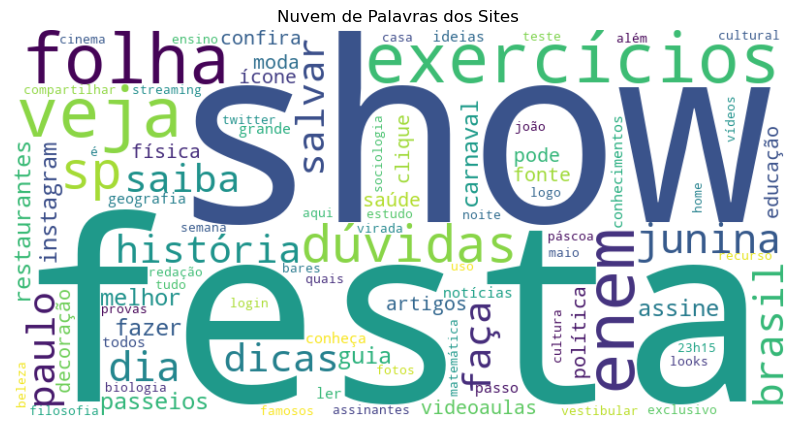

In [11]:
# Criação de wordcloud das palavras mais utilizadas
text_cloud = ' '.join([row['word'] for row in word_counts.limit(100).collect()])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_cloud)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras dos Sites')
plt.show()

In [12]:
from pyspark.sql.functions import explode, col

# SparkSession
spark = SparkSession.builder.getOrCreate()

# Define the list of specific words
specific_words = ["festa", "junina", "festajunina", "saojoao", "milho", "pamonha", "quentão", "festas", "xadrez"]

# Read the CSV file
df = spark.read.csv("C:/Users/danyu/Desktop/dados_sites.csv", header=True)

# Verify the schema and data in the DataFrame
df.printSchema()
df.show()

# Filter out null values in the "texto" and "url" columns
df = df.filter(df["texto"].isNotNull() & df["url"].isNotNull())

# Tokenize the text column
tokenizer = Tokenizer(inputCol="texto", outputCol="words")
df = tokenizer.transform(df)

# Remove stopwords from the tokenized words
remover = StopWordsRemover(inputCol="words", outputCol="filtered_words")
df = remover.transform(df)

# Explode the filtered words column into individual rows
df = df.select(explode("filtered_words").alias("word"), col("url"))

# Filter for specific words
df_specific_words = df.filter(col("word").isin(specific_words))

# Perform group by URL and word to count word occurrences
word_counts = df_specific_words.groupby("url").pivot("word").count().na.fill(0)

# Convert Spark DataFrame to Pandas DataFrame
pandas_df = word_counts.toPandas()

# Sort the Pandas DataFrame by the rows with the highest number of words
pandas_df["total_words"] = pandas_df.sum(axis=1)
pandas_df = pandas_df.sort_values("total_words", ascending=False)

# Show the sorted Pandas DataFrame
pandas_df.head(10).reset_index(drop=True)

root
 |-- url: string (nullable = true)
 |-- texto: string (nullable = true)

+--------------------+--------------------+
|                 url|               texto|
+--------------------+--------------------+
|https://blog.wpen...|Produtos      Ges...|
|https://www.fazfa...|Entrar      Decor...|
|https://www.guiad...|×     Home  Sobre...|
|https://all.accor...|All: Accor Live L...|
|https://www.df.se...|Seja bem-vindo ao...|
|Assessoria de Com...|                null|
|Assessoria de Com...| 2023   Leia mais...|
|https://catracali...|Diversa    Agenda...|
|https://www.abrak...|Compre por WhatsA...|
|https://www.super...|"Buscar :        ...|
|https://blog.xali...|Home  Cuidados  D...|
|O contato com o m...| esse mês é espec...|
|Ficha...   Ver ma...| analisar o desem...|
|https://blog.xali...|Home  Cuidados  D...|
|O contato com o m...| esse mês é espec...|
|Ficha...   Ver ma...| analisar o desem...|
|https://blog.xali...|Home  Cuidados  D...|
|Você já deve ter ...|           Diversão 

C:\Users\danyu\AppData\Local\Temp\ipykernel_18756\4054360493.py:40: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pandas_df["total_words"] = pandas_df.sum(axis=1)


,url,festa,festas,junina,milho,pamonha,quentão,xadrez,total_words
0,https://www.fashionbubbles.com/festas-tematicas/,840,816,408,0,0,0,0,2064
1,https://www.fashionbubbles.com/festa-junina/,920,300,660,0,0,0,10,1890
2,https://www1.folha.uol.com.br/folha-topicos/fe...,372,102,315,21,9,15,0,834
3,https://www.fashionbubbles.com/datas-comemorat...,147,42,153,6,0,3,3,354
4,https://www.fashionbubbles.com/festas-tematica...,117,63,78,0,0,3,87,348
5,https://www.fashionbubbles.com/festas-tematica...,153,39,108,0,0,0,30,330
6,https://www.fashionbubbles.com/,152,32,120,0,0,0,0,304
7,https://www.fashionbubbles.com/festas-tematica...,117,93,72,12,0,0,0,294
8,https://www.fashionbubbles.com/destaque/festa-...,132,12,93,0,0,0,30,267
9,https://www.fashionbubbles.com/festas-tematica...,147,30,75,3,0,0,0,255
